In [1]:
from IPython.display import Image

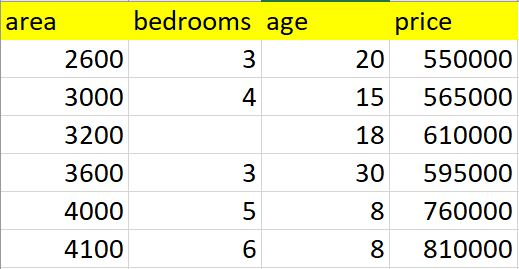

In [2]:
Image("Images/homeprices.jpg")

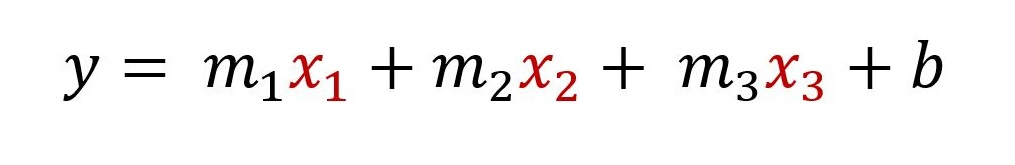

In [3]:
Image("Images/general_equation.jpg")

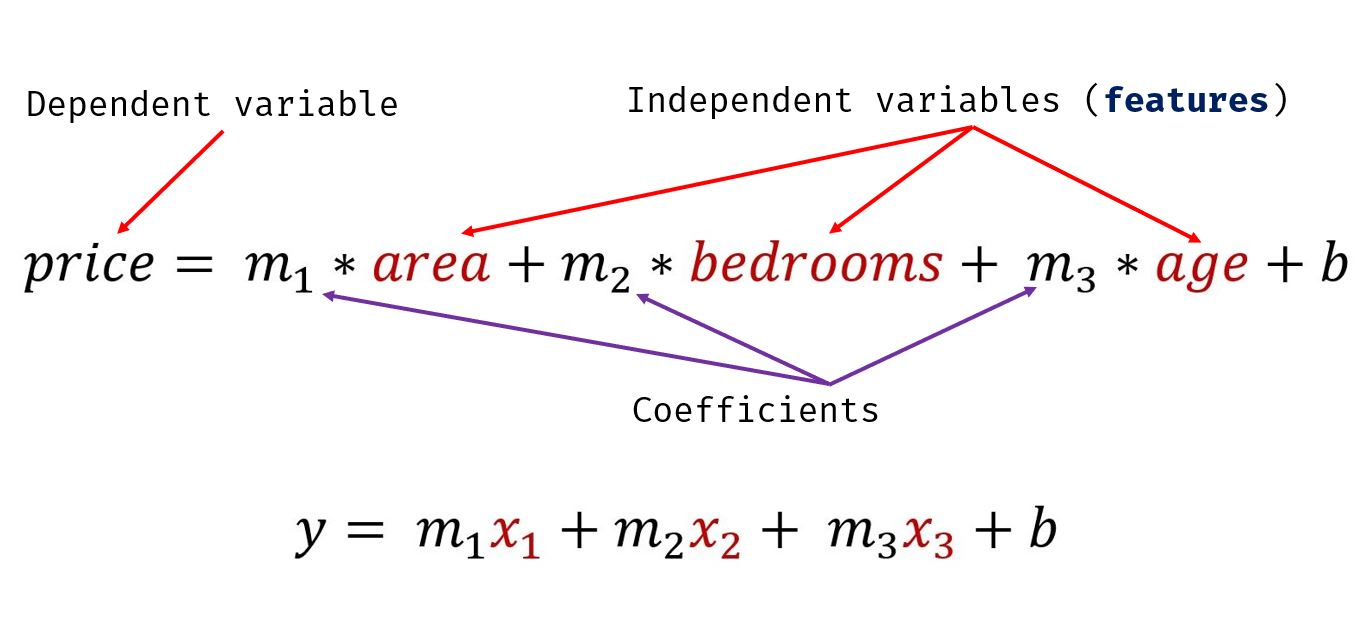

In [4]:
Image("Images/equation.jpg")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("../DataSet/homeprices.csv")
data.head()

,area,bedrooms,age,price,abc,DEF
0,2600,3.0,20,550000,NaN,NaN
1,3000,4.0,15,565000,NaN,1.0
2,3200,NaN,18,610000,NaN,NaN
3,3600,3.0,30,595000,1.0,NaN
4,4000,5.0,8,760000,NaN,NaN


In [7]:
data.isnull().sum()

area        0
bedrooms    1
age         0
price       0
abc         5
DEF         5
dtype: int64

In [8]:
data[ ['bedrooms'] ] = data['bedrooms'].fillna( method = 'bfill' )
print()
print( data['bedrooms' ] )
print()


0    3.0
1    4.0
2    3.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64



In [9]:
data = data.drop( ['abc', 'DEF'], axis = 'columns' )

In [10]:
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [11]:
data.isnull().sum()

area        0
bedrooms    0
age         0
price       0
dtype: int64

In [13]:
y = data.iloc[ :, 3 ]
x = data.iloc[ :,  : 3]

print(f"Total no. of Rows/data = { len( data.index ) }\n")
print(f"{x}\n")
print(y)

Total no. of Rows/data = 6

   area  bedrooms  age
0  2600       3.0   20
1  3000       4.0   15
2  3200       3.0   18
3  3600       3.0   30
4  4000       5.0    8
5  4100       6.0    8

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y )

In [15]:
print( f"len( x_train ) = { len( x_train ) } and len( x_test ) = { len( x_test ) }" )
print( f"len( y_train ) = { len( y_train ) } and len( y_test ) = { len( y_test ) }" )
print( f"12/47 = {12/47}\n" )

print( f"type( x_train ) = { type( x_train ) } and type( x_test ) = { type( x_test ) }" )
print( f"type( y_train ) = { type( y_train ) } and type( y_test ) = { type( y_test ) }" )

print(f"{x_train}\n")
print(f"{x_test}\n")
print(f"{y_train}\n")
print(f"{y_test}")

len( x_train ) = 4 and len( x_test ) = 2
len( y_train ) = 4 and len( y_test ) = 2
12/47 = 0.2553191489361702

type( x_train ) = <class 'pandas.core.frame.DataFrame'> and type( x_test ) = <class 'pandas.core.frame.DataFrame'>
type( y_train ) = <class 'pandas.core.series.Series'> and type( y_test ) = <class 'pandas.core.series.Series'>
   area  bedrooms  age
0  2600       3.0   20
3  3600       3.0   30
2  3200       3.0   18
5  4100       6.0    8

   area  bedrooms  age
1  3000       4.0   15
4  4000       5.0    8

0    550000
3    595000
2    610000
5    810000
Name: price, dtype: int64

1    565000
4    760000
Name: price, dtype: int64


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit( x_train, y_train )    #fit can only take int or float as input. It can take String as input.
                                #So, To train our model we will have to give a integer/float allias name to String.
                                #and then, after computation we will again convert our allias to it's corresponding String.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
x_test

,area,bedrooms,age
1,3000,4.0,15
4,4000,5.0,8


In [22]:
predicted_value = model.predict( x_test )
intercept = model.intercept_
coef = model.coef_

print(f"predicted_value,\n { predicted_value }\n")
print(f"Intercept = { intercept }\n")
print(f"Co-Efficient = { coef }")

predicted_value,
 [632166.66666667 774333.33333333]

Intercept = 327124.99999999953

Co-Efficient = [   86.25       27041.66666667 -4125.        ]


In [23]:
#Score,
#Syntax :- model.score( x_test, y-test )

model.score( x_test, y_test )     #To check the accuract of Predicted Value

0.751910292935934

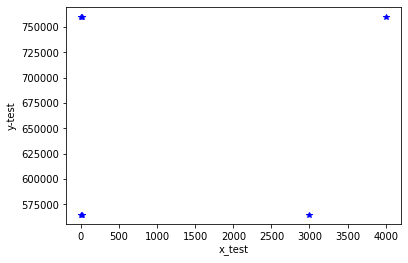

In [24]:
plt.plot( x_test, y_test, marker = "*", color = 'blue', linestyle = '' )
plt.xlabel('x_test')
plt.ylabel('y-test')
plt.show()

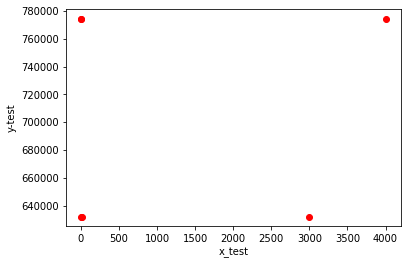

In [25]:
plt.plot( x_test, predicted_value, marker = "o", color = 'red', linestyle = '' )
plt.xlabel('x_test')
plt.ylabel('y-test')
plt.show()

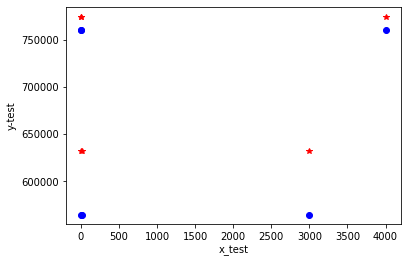

In [26]:
plt.plot( x_test, y_test, marker = "o", color = 'blue', linestyle = '', label = 'y_test' )
plt.plot( x_test, predicted_value, marker = "*", color = 'red', linestyle = '', label = 'y_pred' )
plt.xlabel('x_test')
plt.ylabel('y-test')
plt.show()